<a href="https://colab.research.google.com/github/Zephon-H/notebook/blob/main/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 逻辑回归
## Sigmoid/Logistic Function

$$
g(x) = \frac{1}{1+e^{-x}} \\
h_\theta(x) = g(\theta^Tx) = \frac{1}{1+e^{-\theta^TX}}
$$
## 代价函数
$$
Cost(h_\theta(x),y) = \begin{cases} -\ln(h_\theta(x)), \ if \ y = 1 \\ -\ln(1-h_\theta(x)), \ if \ y = 0 \end{cases} \\ \Rightarrow Cost(h_\theta(x),y) = -y\ln(h_theta(x)) - (1-y)\ln(1-h_\theta(x)) \\
$$

$$
Cost(h_\theta(x),y) = - \frac{1}{m} \sum_{i=1}^m [y\ln(h_\theta(x)) + (1-y) \ln (1-h_\theta(x))] \\
\frac{\partial Cost(h_\theta(x),y)}{\partial \theta} = \frac{1}{m} \sum_{i=1}^m x(h_\theta(x) - y)
$$

## 正则化逻辑回归代价函数
$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^{(i)}\ln(h_\theta(x^{(i)})) + (1-y^{(i)}) \ln (1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2
$$

## 正确率(Precision)和召回率(Recall)

## 自定义逻辑回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
# 数据是否需要标准化
scale = False

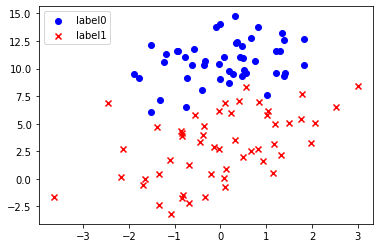

In [ ]:
data = np.genfromtxt('LR-testSet.csv', delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]
def plot():
  x0 = []
  x1 = []
  y0 = []
  y1 = []
  # 切分不同类别的数据 
  for i in range(len(x_data)):
    if y_data[i] == 0:
      x0.append(x_data[i,0])
      y0.append(x_data[i,1])
    else:
      x1.append(x_data[i,0])
      y1.append(x_data[i,1])
  # 画图
  scatter0 = plt.scatter(x0,y0,c='b',marker='o')
  scatter1 = plt.scatter(x1,y1,c='r',marker='x')
  # 画图例
  plt.legend(handles=[scatter0,scatter1],labels=['label0', 'label1'], loc='best')

plot()
plt.show()

In [ ]:
# 数据处理，添加偏置项
y_data = data[:,-1,np.newaxis]
X_data = np.hstack([np.ones((100,1)),x_data])

In [ ]:
def sigmoid(x):
  return 1.0 / (1+np.exp(-x))

def cost(xMat, yMat, ws):
  left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
  right = np.multiply(1-yMat,np.log(1-sigmoid(xMat * ws)))
  return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
  if scale == True:
    xArr = preprocessing.scale(xArr)
  xMat = np.mat(xArr)
  yMat = np.mat(yArr)
  lr = 0.001
  epochs = 10000
  costList = []
  # 计算数据行列数,行：数据个数，列：权值个数
  m,n = np.shape(xMat)
  # 初始化权值
  ws = np.mat(np.ones((n,1)))
  for i in range(epochs + 1):
    h = sigmoid(xMat * ws)
    # 计算误差
    ws_grad = xMat.T * (h-yMat)/m
    ws = ws - lr * ws_grad

    if i % 50 == 0:
      costList.append(cost(xMat,yMat,ws))
  return ws,costList

In [ ]:
ws,costList = gradAscent(X_data,y_data)
ws

matrix([[ 2.05836354],
        [ 0.3510579 ],
        [-0.36341304]])

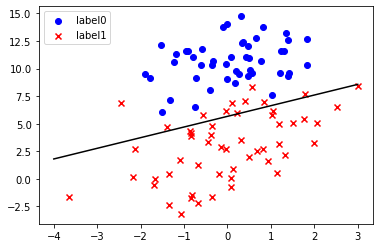

[[-4], [3]]

In [ ]:
if scale == False:
  plot()
  x_test = [[-4],[3]]
  y_test = (-ws[0] - x_test*ws[1])/ws[2]
  plt.plot(x_test, y_test, 'k')
  plt.show()

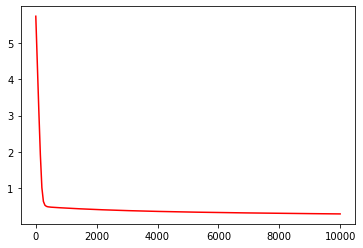

In [ ]:
# 画图Loss值的变化
x = np.linspace(0,10000,201)
plt.plot(x, costList, c='r')
plt.show()

In [ ]:
# 预测
def predict(x_data, ws):
  if scale == True:
    x_data = preprossing.scale(x_data)
  xMat = np.mat(x_data)
  ws = np.mat(ws)
  return [1 if x>= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(X_data,ws)
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        47
         1.0       1.00      0.81      0.90        53

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100



## sklearn-逻辑回归

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
scale = False

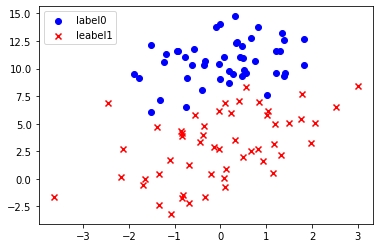

In [ ]:
data = np.genfromtxt('LR-testSet.csv', delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]
def plot():
  x0 = []
  x1 = []
  y0 = []
  y1 = []
  for i in range(len(x_data)):
    if y_data[i] == 0:
      x0.append(x_data[i,0])
      y0.append(x_data[i,1])
    else:
      x1.append(x_data[i,0])
      y1.append(x_data[i,1])
  scatter0 = plt.scatter(x0, y0, c='b', marker='o')
  scatter1 = plt.scatter(x1, y1, c='r', marker='x')
  plt.legend(handles=[scatter0,scatter1], labels = ['label0','leabel1'], loc='best')

plot()
plt.show()

In [ ]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

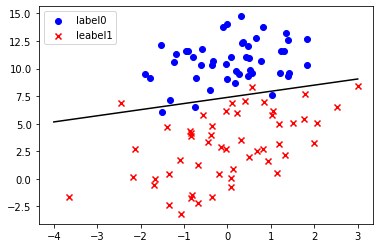

In [ ]:
if scale == False:
  plot()
  x_test = np.array([[-4],[3]])
  y_test = (-logistic.intercept_ - x_test*logistic.coef_[0][0])/logistic.coef_[0][1]
  plt.plot(x_test,y_test,'k')
  plt.show()

In [ ]:
predictions = logistic.predict(x_data)
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.94      0.96      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## 非线性逻辑回归


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
# 数据是否需要标准化
scale = False

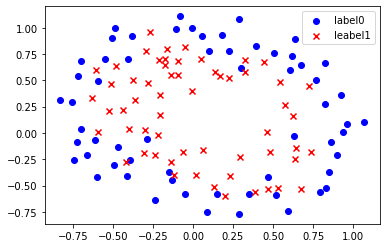

In [ ]:
data = np.genfromtxt('LR-testSet2.txt', delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

def plot():
  x0 = []
  x1 = []
  y0 = []
  y1 = []
  for i in range(len(x_data)):
    if y_data[i] == 0:
      x0.append(x_data[i,0])
      y0.append(x_data[i,1])
    else:
      x1.append(x_data[i,0])
      y1.append(x_data[i,1])
  scatter0 = plt.scatter(x0, y0, c='b', marker='o')
  scatter1 = plt.scatter(x1, y1, c='r', marker='x')
  plt.legend(handles=[scatter0,scatter1], labels = ['label0','leabel1'], loc='best')

plot()
plt.show()

In [ ]:
# 定义多项式回归，degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=2)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)

In [ ]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))

def cost(xMat, yMat, ws):
  left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
  right = np.multiply(1-yMat, np.log(1-sigmoid(xMat*ws)))
  return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
  if scale == True:
    xArr = preprocessing.scale(xArr)
  xMat = np.mat(xArr)
  yMat = np.mat(yArr)
  lr = 0.04
  epochs = 50000
  costList = []
  m,n = np.shape(xMat)
  ws = np.mat(np.ones((n,1)))
  for i in range(epochs+1):
    h = sigmoid(xMat * ws)
    ws_grad = xMat.T * (h-yMat)/m
    ws = ws-lr*ws_grad

    if i % 50 ==0:
      costList.append(cost(xMat,yMat,ws))
  return ws, costList

In [ ]:
ws, costList = gradAscent(x_poly, y_data)
ws

matrix([[  4.57537411],
        [  2.78339528],
        [  3.6129119 ],
        [-10.63210507],
        [ -6.38917357],
        [-10.35417147]])

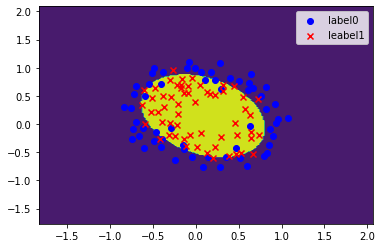

In [ ]:
x_min, x_max = x_data[:,0].min() - 1, x_data[:,0].max() + 1
y_min, y_max = x_data[:,1].min() - 1, x_data[:,1].max() + 1

# 生成网格矩阵
xx ,yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(np.array(ws)))
for i in range(len(z)):
  if z[i] > 0.5:
    z[i] = 1
  else:
    z[i] = 0
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)
plot()
plt.show()

In [ ]:
def predict(x_data, ws):
  xMat = np.mat(x_data)
  ws = np.mat(ws)
  return [1 if x>= 0.5 else 0 for x in sigmoid(xMat * ws)]

predictions = predict(x_poly, ws)
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86        60
         1.0       0.85      0.86      0.85        58

    accuracy                           0.86       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.86      0.86      0.86       118



## sklearn-非线性逻辑回归

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

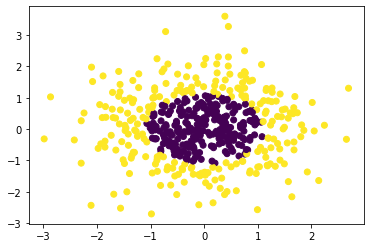

In [ ]:
# 生成二维正态分布，生成的数据按分位数分为两类，500个样本，2个样本特征
# 可以生成两类或多烦数据
x_data, y_data = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()

In [ ]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

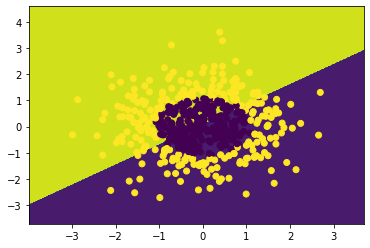

score: 0.534


In [ ]:
x_min, x_max = x_data[:,0].min() - 1, x_data[:,0].max() + 1
y_min, y_max = x_data[:,1].min() - 1, x_data[:,1].max() + 1

# 生成网格矩阵
xx ,yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)
plt.scatter(x_data[:,0], x_data[:,1],c=y_data)
plt.show()
print("score:",logistic.score(x_data,y_data))

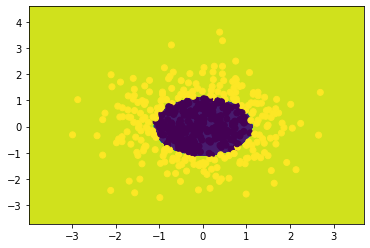

score: 0.99


In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_data)
logistic = linear_model.LogisticRegression()
logistic.fit(x_poly,y_data)
x_min, x_max = x_data[:,0].min() - 1, x_data[:,0].max() + 1
y_min, y_max = x_data[:,1].min() - 1, x_data[:,1].max() + 1

# 生成网格矩阵
xx ,yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)
plt.scatter(x_data[:,0], x_data[:,1],c=y_data)
plt.show()
print("score:",logistic.score(x_poly,y_data))